In [17]:
# ============================================================
# STEP 0 : Import Required Libraries
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

# Optional: prettier plots
sns.set(style="whitegrid")

In [64]:
# ============================================================
# 📘 PEP Student Performance Dataset Generator (with Grades)
# ============================================================

import pandas as pd
import numpy as np
import random

# -------------------------------
# Step 1: Initialize
# -------------------------------
np.random.seed(42)
random.seed(42)
n = 300  # number of students

# -------------------------------
# Step 2: Create Base Data
# -------------------------------
data = {
    "Student_ID": np.arange(1, n + 1),
    "Age": np.random.randint(18, 24, n),
    "Gender": np.random.choice(["M", "F"], n),
    "Height_cm": np.random.randint(160, 186, n),
    "Weight_kg": np.random.randint(55, 85, n)
}
df = pd.DataFrame(data)

# Calculate BMI
df["BMI"] = (df["Weight_kg"] / (df["Height_cm"] / 100) ** 2).round(1)

# -------------------------------
# Step 3: Activity Data
# -------------------------------
df["Run_3km_Min"] = np.random.uniform(12, 30, n).round(1)
df["Pushups"] = np.random.randint(12, 36, n)
df["Situps"] = np.random.randint(14, 36, n)

# Beep Test (65% between 6–8, rest 4–10)
df["Beep_Test"] = [
    round(random.uniform(6, 8), 1) if random.random() < 0.65 else round(random.uniform(4, 10), 1)
    for _ in range(n)
]

# Attendance (80–90% for 80% students, else 60–79%)
df["Attendance_%"] = [
    round(random.uniform(80, 90), 1) if random.random() < 0.8 else round(random.uniform(60, 79), 1)
    for _ in range(n)
]

# -------------------------------
# Step 4: Performance Scores
# -------------------------------
df["Speed_Score"] = ((30 - df["Run_3km_Min"]) / 18 * 10).round(2)
df["Strength_Score"] = ((df["Pushups"] + df["Situps"]) / 70 * 10).round(2)
df["Overall_Score"] = ((df["Speed_Score"] + df["Strength_Score"] + df["Beep_Test"]) / 3).round(1)

# -------------------------------
# Step 5: Assign Grades (A–F)
# -------------------------------
def assign_grade(row):
    if row["Attendance_%"] < 80:
        return "F"
    elif row["Overall_Score"] >= 8.0:
        return "A"
    elif row["Overall_Score"] >= 7.0:
        return "B"
    elif row["Overall_Score"] >= 6.0:
        return "C"
    elif row["Overall_Score"] >= 5.0:
        return "D"
    else:
        return "F"

df["Grade"] = df.apply(assign_grade, axis=1)

# -------------------------------
# Step 6: Save to Excel
# -------------------------------
output_file = "PEP_Student_Performance.xlsx"
df.to_excel(output_file, index=False)

# -------------------------------
# Step 7: Summary
# -------------------------------
print(f"✅ Dataset generated successfully with {len(df)} rows and {len(df.columns)} columns.")
print(f"📂 Saved as: {output_file}")
print("\n🎓 Grade distribution:")
print(df['Grade'].value_counts())
display(df.head(10))


✅ Dataset generated successfully with 300 rows and 15 columns.
📂 Saved as: PEP_Student_Performance.xlsx

🎓 Grade distribution:
Grade
F    89
C    74
D    73
B    51
A    13
Name: count, dtype: int64


,Student_ID,Age,Gender,Height_cm,Weight_kg,BMI,Run_3km_Min,Pushups,Situps,Beep_Test,Attendance_%,Speed_Score,Strength_Score,Overall_Score,Grade
0,1,21,F,161,67,25.8,17.8,28,15,6.1,87.2,6.78,6.14,6.3,C
1,2,22,F,176,58,18.7,22.7,26,27,6.4,87.6,4.06,7.57,6.0,C
2,3,20,M,179,84,26.2,18.6,23,15,8.1,86.5,6.33,5.43,6.6,C
3,4,22,M,183,55,16.4,20.2,27,17,4.5,87.9,5.44,6.29,5.4,D
4,5,22,M,171,71,24.3,21.9,35,30,6.1,82.2,4.50,9.29,6.6,C
5,6,19,M,177,62,19.8,21.9,30,16,7.0,83.1,4.50,6.57,6.0,C
6,7,20,F,162,56,21.3,15.6,19,26,6.4,84.7,8.00,6.43,6.9,C
7,8,20,F,160,82,32.0,24.3,32,22,7.1,84.3,3.17,7.71,6.0,C
8,9,20,F,160,62,24.2,13.6,28,20,7.2,83.3,9.11,6.86,7.7,B
9,10,22,F,178,61,19.3,14.5,34,28,4.0,82.7,8.61,8.86,7.2,B


In [67]:
# ============================================================
# STEP 1 : Load Dataset
# ============================================================

# Load Excel dataset generated earlier
df = pd.read_excel("PEP_Student_Performance_Final.xlsx")

print("✅ Data loaded successfully!")
print("Rows, Columns:", df.shape)
display(df.head())


✅ Data loaded successfully!
Rows, Columns: (300, 15)


,Student_ID,Age,Gender,Height_cm,Weight_kg,BMI,Run_3km_Min,Pushups,Situps,Beep_Test,Attendance_%,Speed_Score,Strength_Score,Overall_Score,Grade
0,1,21,F,161,67,25.8,23.5,27,32,7.6,82.6,3.61,8.43,6.5,C
1,2,22,F,176,58,18.7,13.3,29,25,6.7,83.0,9.28,7.71,7.9,B
2,3,20,M,179,84,26.2,17.0,15,26,7.5,86.5,7.22,5.86,6.9,C
3,4,22,M,183,55,16.4,12.0,28,24,5.9,87.8,10.00,7.43,7.8,B
4,5,22,M,171,71,24.3,28.0,23,29,7.1,85.8,1.11,7.43,5.2,D



--- Missing Values ---
Student_ID        0
Age               0
Gender            0
Height_cm         0
Weight_kg         0
BMI               0
Run_3km_Min       0
Pushups           0
Situps            0
Beep_Test         0
Attendance_%      0
Speed_Score       0
Strength_Score    0
Overall_Score     0
Grade             0
dtype: int64

--- Grade Distribution ---
Grade
C    108
B     69
F     56
D     45
A     22
Name: count, dtype: int64


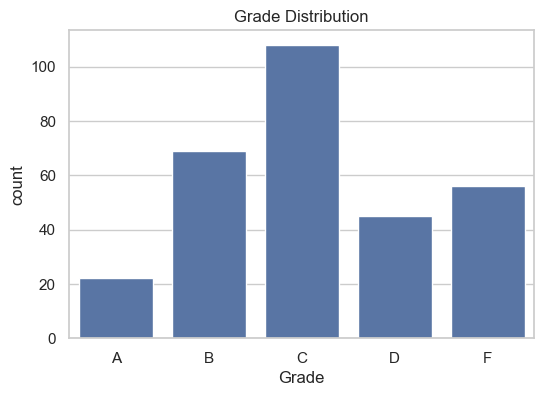

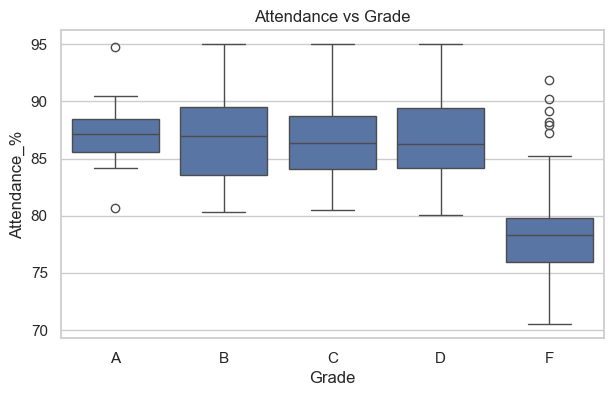

In [44]:
# ============================================================
# STEP 2 : Basic EDA
# ============================================================

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Grade Distribution ---")
print(df["Grade"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Grade", data=df, order=sorted(df["Grade"].unique()))
plt.title("Grade Distribution")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x="Grade", y="Attendance_%", data=df, order=sorted(df["Grade"].unique()))
plt.title("Attendance vs Grade")
plt.show()


In [59]:
# ============================================================
# STEP 3 : Feature Engineering & Cleaning
# ============================================================

# Drop unnecessary columns
drop_cols = ["Student_ID"]
df = df.drop(columns=drop_cols)

# Create new derived features
df["Fitness_Score"] = (df["Pushups"] + df["Situps"] + df["Beep_Test"]) / 3
df["Speed_Index"] = 30 - df["Run_3km_Min"]       # lower time = better
df["Performance_Index"] = (df["Fitness_Score"] + df["Speed_Index"]) / 2

# Drop NA (if any)
df = df.dropna().reset_index(drop=True)

# Define features and target
x = ["Age", "Gender", "Height_cm", "Weight_kg", "BMI","Run_3km_Min", "Pushups", "Situps", "Beep_Test","Attendance_%", "Speed_Score", "Strength_Score", "Overall_Score"]
X = df[x]
y = df["Grade"]

# Check datatypes
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Run_3km_Min', 'Pushups', 'Situps', 'Beep_Test', 'Attendance_%', 'Speed_Score', 'Strength_Score', 'Overall_Score']
Categorical columns: ['Gender']


Numeric columns: ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Run_3km_Min', 'Pushups', 'Situps', 'Beep_Test', 'Attendance_%', 'Fitness_Score', 'Speed_Index', 'Performance_Index']
Categorical columns: ['Gender']
🎯 Model Accuracy: 0.783
📈 R² Score: 0.633

--- Classification Report ---
              precision    recall  f1-score   support

           A       1.00      0.75      0.86         4
           B       0.86      0.86      0.86        14
           C       0.86      0.82      0.84        22
           D       0.67      0.67      0.67         9
           F       0.62      0.73      0.67        11

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.78        60
weighted avg       0.79      0.78      0.79        60



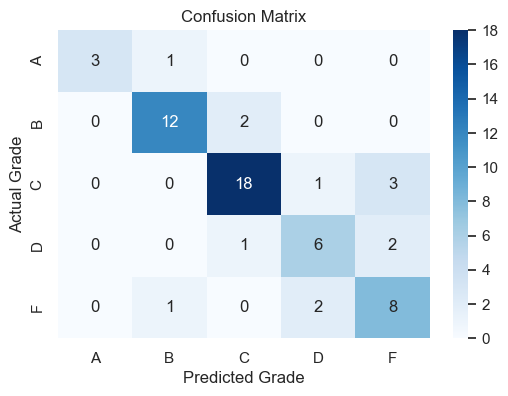

In [69]:
# ============================================================
# STEP 3 : Feature Engineering & Cleaning (Multicollinearity Fix)
# ============================================================

# ✔ Remove columns that do not help prediction
drop_cols = ["Student_ID", "Speed_Score", "Strength_Score", "Overall_Score"]
df = df.drop(columns=drop_cols)

# ------------------------------------------------------------
# ✔ Create derived features (these are allowed)
# ------------------------------------------------------------

# Fitness score combining pushups, situps, beep test
df["Fitness_Score"] = (df["Pushups"] + df["Situps"] + df["Beep_Test"]) / 3

# Speed index: lower running time → better fitness
df["Speed_Index"] = 30 - df["Run_3km_Min"]

# Overall performance index from both fitness + speed
df["Performance_Index"] = (df["Fitness_Score"] + df["Speed_Index"]) / 2

# Drop NA values
df = df.dropna().reset_index(drop=True)

# ------------------------------------------------------------
# ✔ Final feature list after multicollinearity removal
# ------------------------------------------------------------

x = [
    "Age", "Gender", "Height_cm", "Weight_kg", "BMI",
    "Run_3km_Min", "Pushups", "Situps", "Beep_Test",
    "Attendance_%", 
    "Fitness_Score", "Speed_Index", "Performance_Index"
]

X = df[x]
y = df["Grade"]

# Check numeric / categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


# ============================================================
# STEP 5 : Test, Evaluate & R² Score
# ============================================================

# Predictions
y_pred = model.predict(X_test)

# Decode labels (convert 0,1,2 → A,B,C)
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)

# R² is not ideal for classification, but included since you asked
r2 = r2_score(y_test, y_pred)

print(f"🎯 Model Accuracy: {acc:.3f}")
print(f"📈 R² Score: {r2:.3f}\n")

print("--- Classification Report ---")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Grade")
plt.ylabel("Actual Grade")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [25]:
# ============================================================
# STEP 2 : Feature Engineering
# ============================================================
# Why: Derived features often reveal hidden patterns that improve model accuracy.
# We'll create new columns that combine multiple performance indicators.

# Drop unnecessary identifiers
if "Student_ID" in df.columns:
    df = df.drop(columns=["Student_ID"])

# Create synthetic performance metrics
df["Performance_Index"] = (
    0.4 * (30 - df["Run_3km_Min"]) +  # Faster runners = higher score
    0.3 * df["Beep_Test"] +            # Higher beep test = better stamina
    0.2 * (df["Pushups"] + df["Situps"]) / 2 +  # Strength component
    0.1 * df["Attendance_%"] / 10      # Attendance contributes slightly
)

df["Fitness_Score"] = (df["Pushups"] + df["Situps"] + df["Beep_Test"]) / 3
df["Speed_Index"] = 30 - df["Run_3km_Min"]  # Lower time → higher speed score

# Remove any missing data
df = df.dropna().reset_index(drop=True)

print("✅ Feature engineering complete!")
print("Data shape after feature creation:", df.shape)
display(df.head())

# Next → Prepare our features and labels for model training.


✅ Feature engineering complete!
Data shape after feature creation: (300, 17)


,Age,Gender,Height_cm,Weight_kg,BMI,Run_3km_Min,Pushups,Situps,Beep_Test,Attendance_%,Speed_Score,Strength_Score,Overall_Score,Grade,Fitness_Score,Speed_Index,Performance_Index
0,21,F,161,67,25.8,23.5,27,32,7.6,82.6,3.61,8.43,6.5,C,22.200000,6.5,11.606
1,22,F,176,58,18.7,13.3,29,25,6.7,83.0,9.28,7.71,7.9,B,20.233333,16.7,14.920
2,20,M,179,84,26.2,17.0,15,26,7.5,86.5,7.22,5.86,6.9,C,16.166667,13.0,12.415
3,22,M,183,55,16.4,12.0,28,24,5.9,87.8,10.00,7.43,7.8,B,19.300000,18.0,15.048
4,22,M,171,71,24.3,28.0,23,29,7.1,85.8,1.11,7.43,5.2,D,19.700000,2.0,8.988


In [27]:
# ============================================================
# STEP 3 : Prepare Features & Encode Target
# ============================================================
# Why: The model can only work with numerical data.
# We'll convert the Grade labels (A/B/C/D/F) into numeric form for classification.

label_encoder = LabelEncoder()
df["Grade_encoded"] = label_encoder.fit_transform(df["Grade"])

# Define which columns will be used for prediction (X) and which is the target (y)
features = [
    "Gender", "Height_cm", "Weight_kg", "BMI",
    "Run_3km_Min", "Pushups", "Situps", "Beep_Test", "Attendance_%",
    "Fitness_Score", "Speed_Index", "Performance_Index"
]
target = "Grade_encoded"

X = df[features]
y = df[target]

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# Next → Encode categorical features and split data into training/testing sets.


Numeric columns: ['Height_cm', 'Weight_kg', 'BMI', 'Run_3km_Min', 'Pushups', 'Situps', 'Beep_Test', 'Attendance_%', 'Fitness_Score', 'Speed_Index', 'Performance_Index']
Categorical columns: ['Gender']


In [29]:
# ============================================================
# STEP 4 : Encode Categorical Data & Split Dataset
# ============================================================
# Why: SMOTE requires purely numeric data, so we need to encode Gender into numbers first.
# Expectation: After encoding, dataset shape should increase slightly (due to new dummy variables).

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data encoded and split successfully.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Next → Balance the training data using SMOTE.


✅ Data encoded and split successfully.
Training set shape: (240, 12)
Test set shape: (60, 12)


In [31]:
# ============================================================
# STEP 5 : Handle Class Imbalance (SMOTE)
# ============================================================
# Why: Some grades (like A or F) might appear much less often.
# SMOTE (Synthetic Minority Oversampling Technique) generates artificial samples of minority classes.
# Expectation: After SMOTE, the number of samples per class should be roughly equal.

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("✅ Applied SMOTE successfully!")
print("Before SMOTE class distribution:", np.bincount(y_train))
print("After SMOTE class distribution:", np.bincount(y_train_res))

# Next → Scale numeric columns to ensure fair contribution to model learning.


✅ Applied SMOTE successfully!
Before SMOTE class distribution: [18 55 86 36 45]
After SMOTE class distribution: [86 86 86 86 86]


In [33]:
# ============================================================
# STEP 6 : Feature Scaling (Standardization)
# ============================================================
# Why: Features like height (in cm) and attendance (in %) are on different scales.
# Scaling standardizes them so that no single feature dominates the model.
# Expectation: All numeric columns will have mean ≈ 0 and std ≈ 1 after scaling.

scaler = StandardScaler()
X_train_res[num_cols] = scaler.fit_transform(X_train_res[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("✅ Feature scaling complete.")
# Next → Train the XGBoost model on balanced and scaled data.


✅ Feature scaling complete.


In [35]:
# ============================================================
# STEP 7 : Train XGBoost Classifier
# ============================================================
# Why: XGBoost is a powerful gradient boosting algorithm that performs well on tabular data.
# Expectation: Model will learn patterns between physical performance and student grades.

xgb_model = XGBClassifier(
    n_estimators=400,        # number of trees
    learning_rate=0.05,      # smaller learning rate for gradual learning
    max_depth=7,             # depth of each tree
    subsample=0.9,           # use 90% data per tree
    colsample_bytree=0.9,    # use 90% of features per tree
    random_state=42,
    eval_metric="mlogloss"
)

xgb_model.fit(X_train_res, y_train_res)

print("✅ Model training complete!")
# Next → Evaluate how well it performs on unseen test data.


✅ Model training complete!


🎯 Model Accuracy: 0.850
📈 R² Score: 0.890

--- Classification Report ---
              precision    recall  f1-score   support

           A       0.80      1.00      0.89         4
           B       0.79      0.79      0.79        14
           C       0.89      0.73      0.80        22
           D       0.75      1.00      0.86         9
           F       1.00      1.00      1.00        11

    accuracy                           0.85        60
   macro avg       0.84      0.90      0.87        60
weighted avg       0.86      0.85      0.85        60



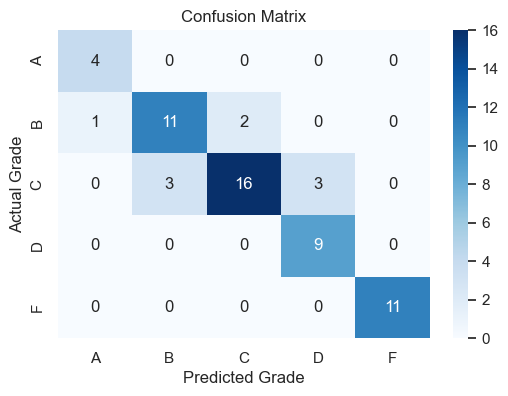

In [37]:
# ============================================================
# STEP 8 : Evaluate Model Performance
# ============================================================
# Why: Check model accuracy, generalization, and error distribution.
# We'll compute Accuracy, R², and generate a classification report and confusion matrix.

y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🎯 Model Accuracy: {acc:.3f}")
print(f"📈 R² Score: {r2:.3f}\n")

print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualize confusion matrix to see where misclassifications happen
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Grade")
plt.ylabel("Actual Grade")
plt.title("Confusion Matrix")
plt.show()

# Observation: If most predictions lie on the diagonal, model accuracy is high.
# Next → Analyze which features contribute most to these predictions.


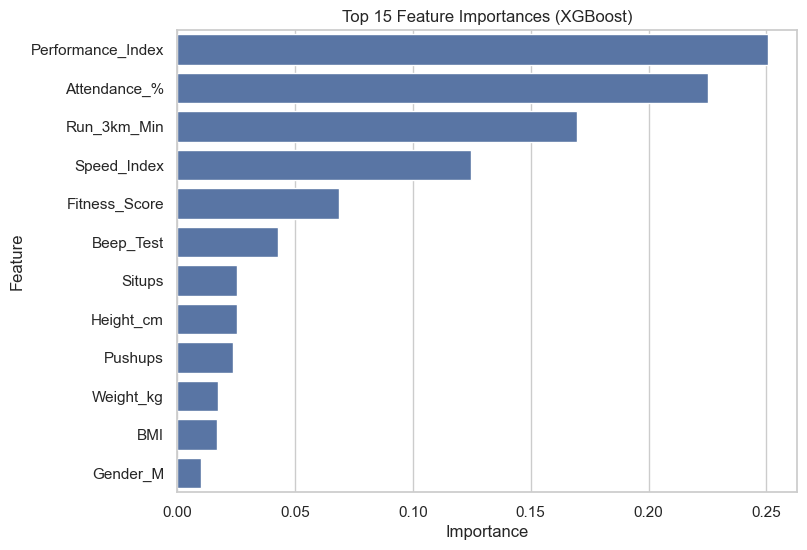

In [39]:
# ============================================================
# STEP 9 : Feature Importance Analysis
# ============================================================
# Why: Understanding which features drive the predictions builds model interpretability.
# Expectation: The model should rank performance and fitness-related metrics high.

importance_df = pd.DataFrame({
    "Feature": X_train_res.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(15))
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

# Observation: Features like Performance_Index, Run_3km_Min, and Attendance_% 
# should appear among top contributors.
# Next → Optionally tune hyperparameters using GridSearchCV for further accuracy boost.


C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


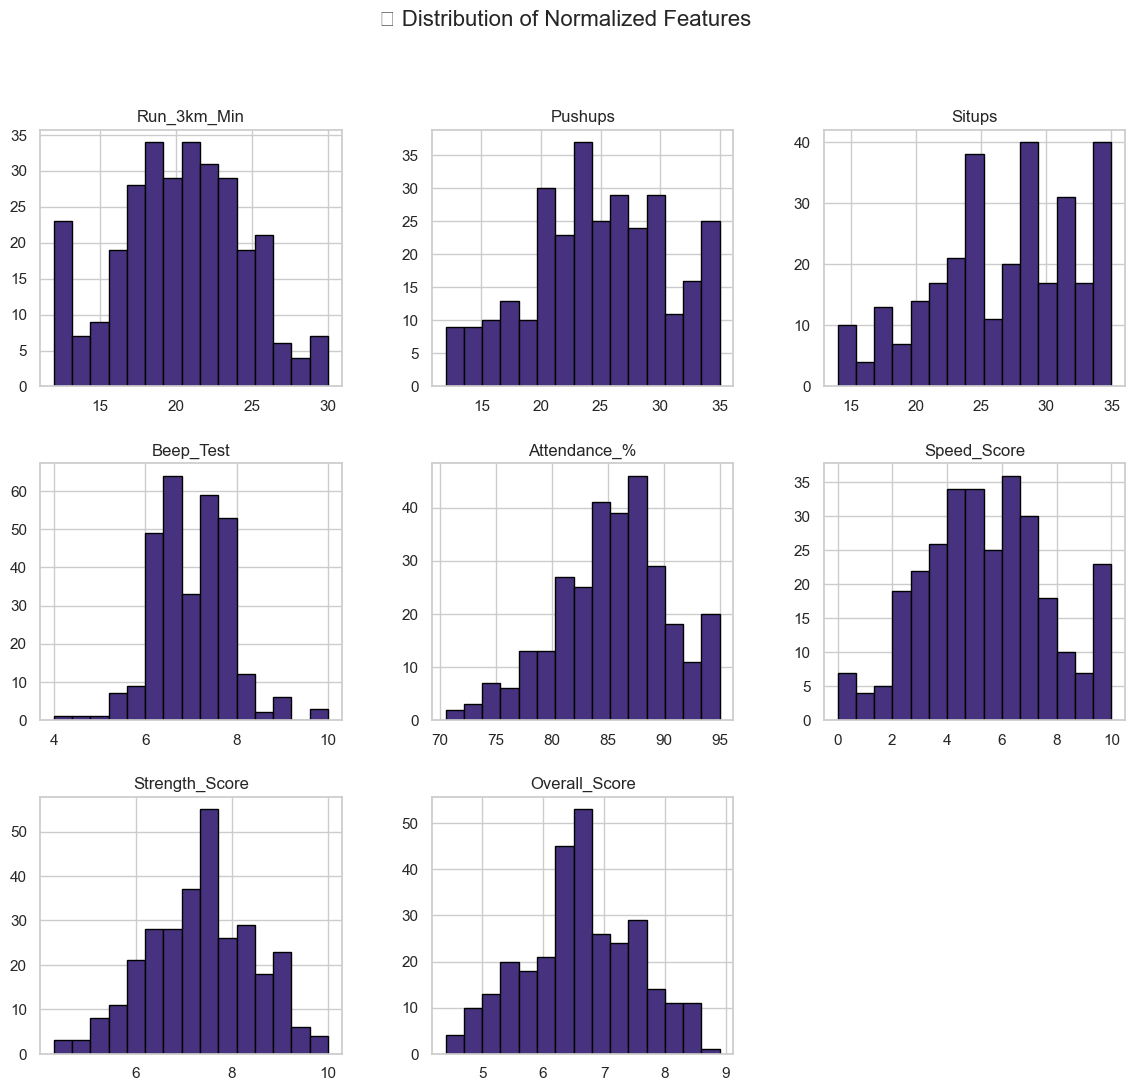

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


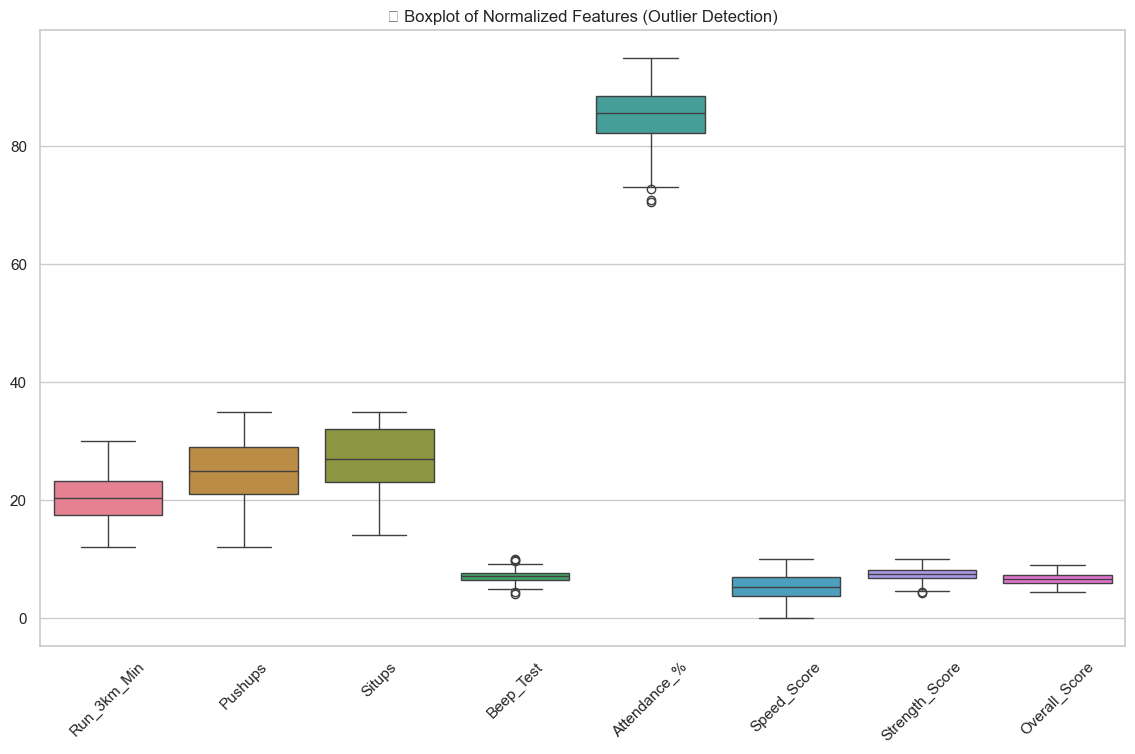

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


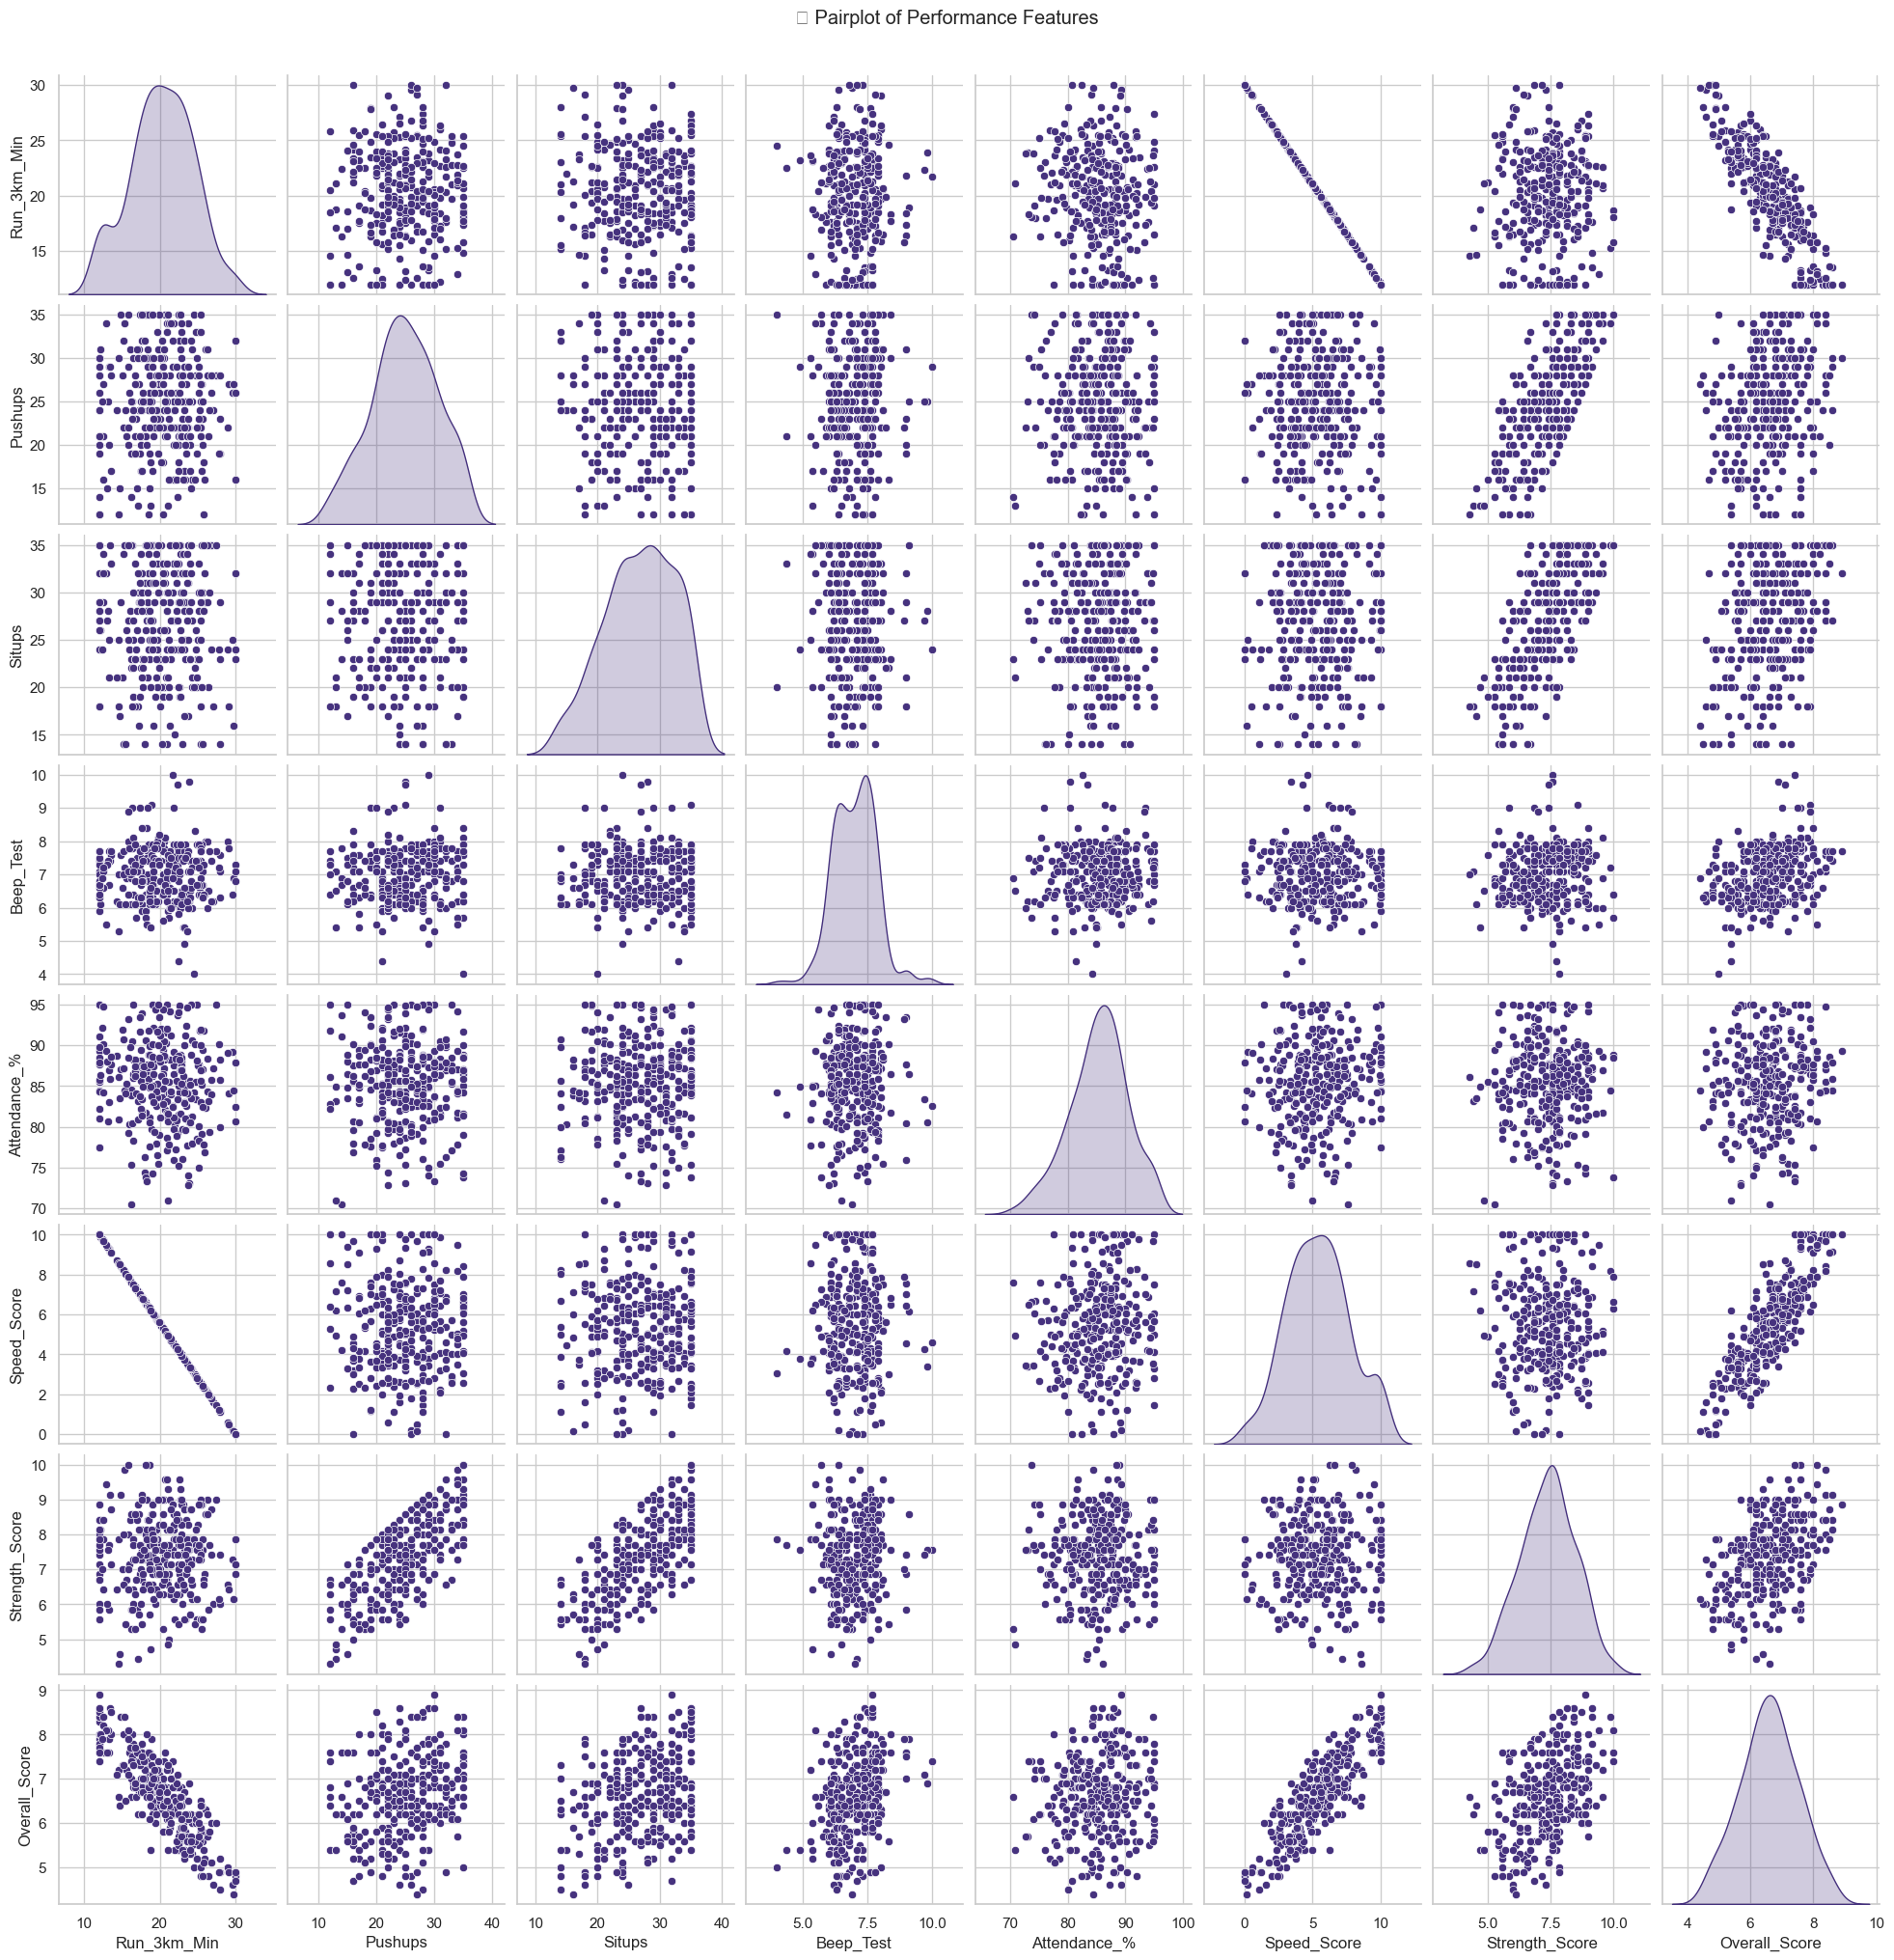

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


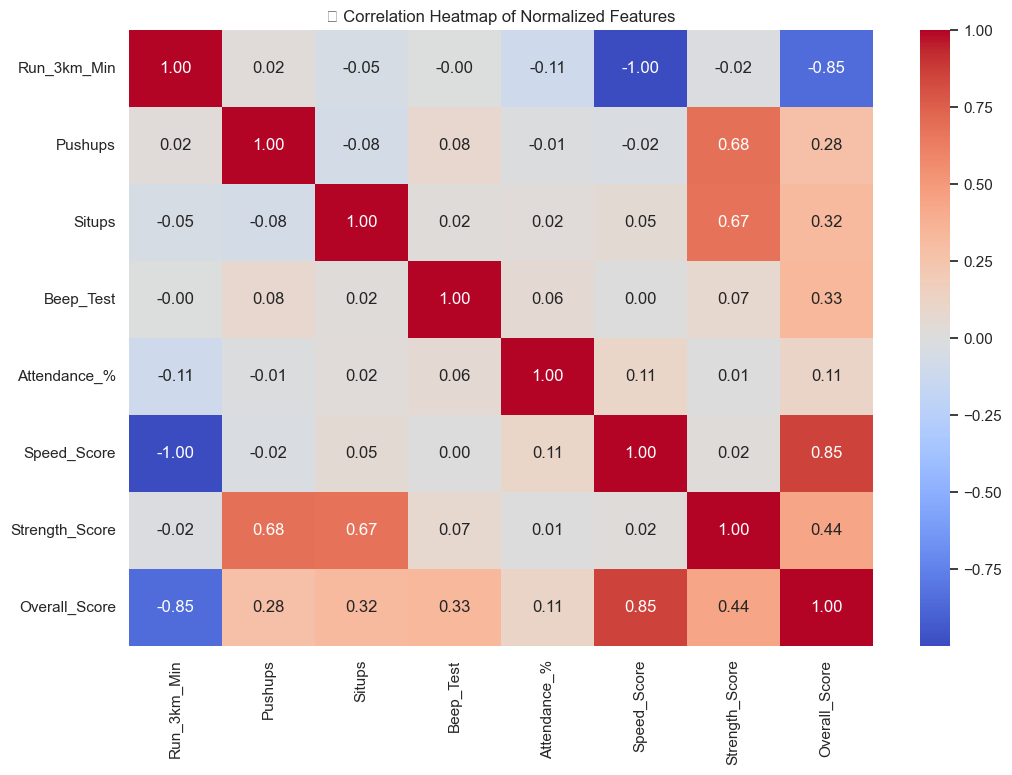

C:\Users\HP\AppData\Local\Temp\ipykernel_3172\2957446738.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data=df, palette="coolwarm")
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


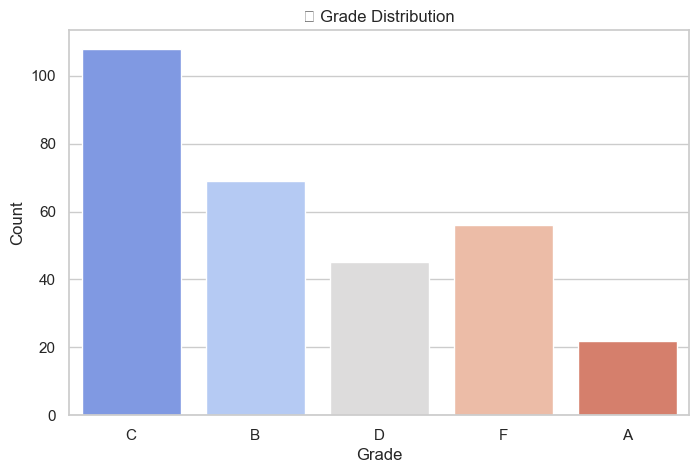

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


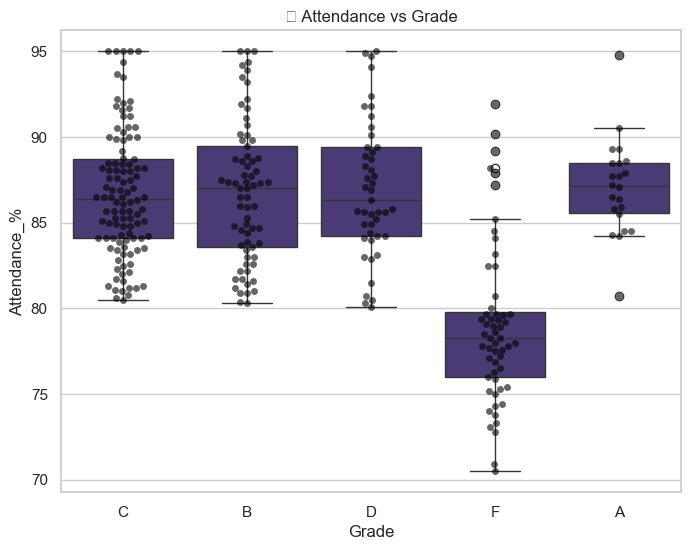

C:\Users\HP\AppData\Local\Temp\ipykernel_3172\2957446738.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grade", y="Overall_Score", data=df, palette="viridis")
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


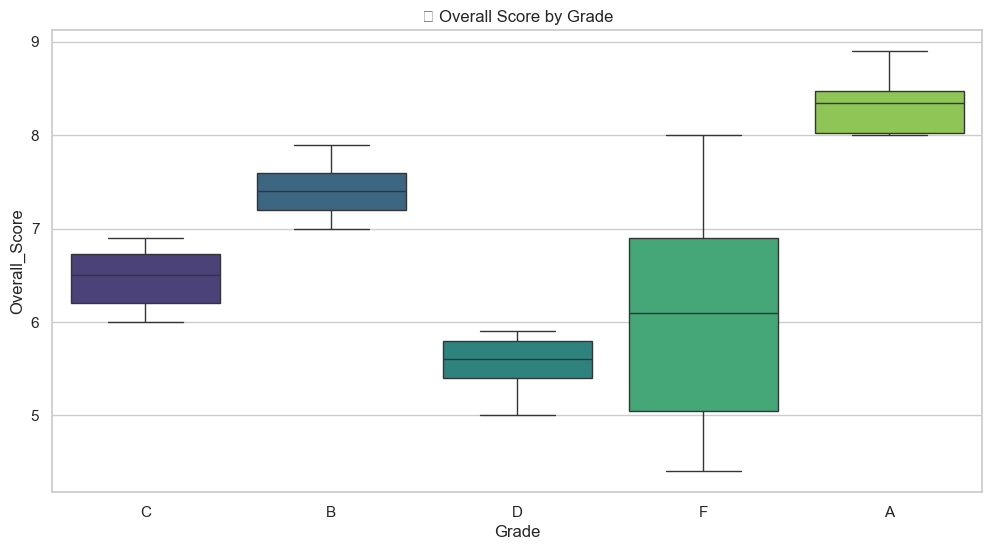

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


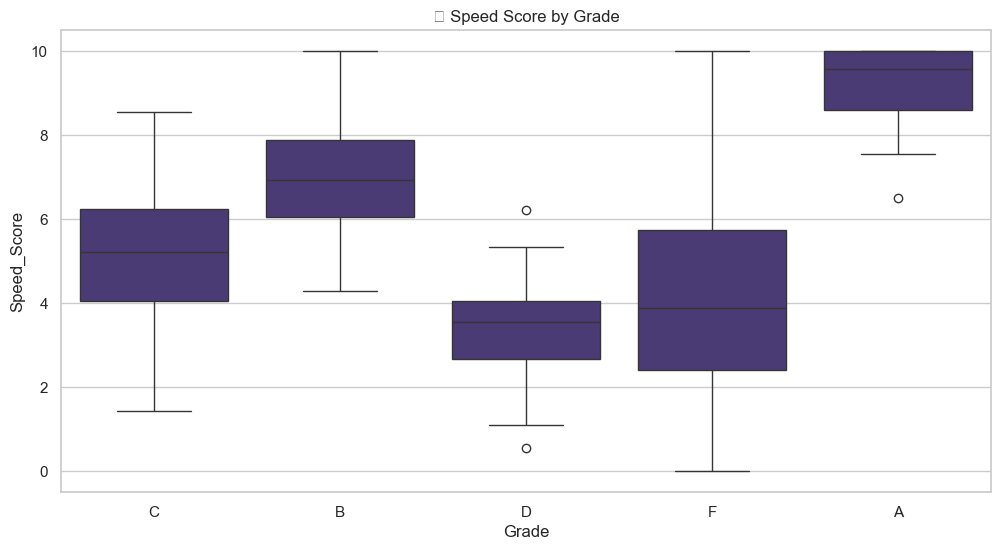

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


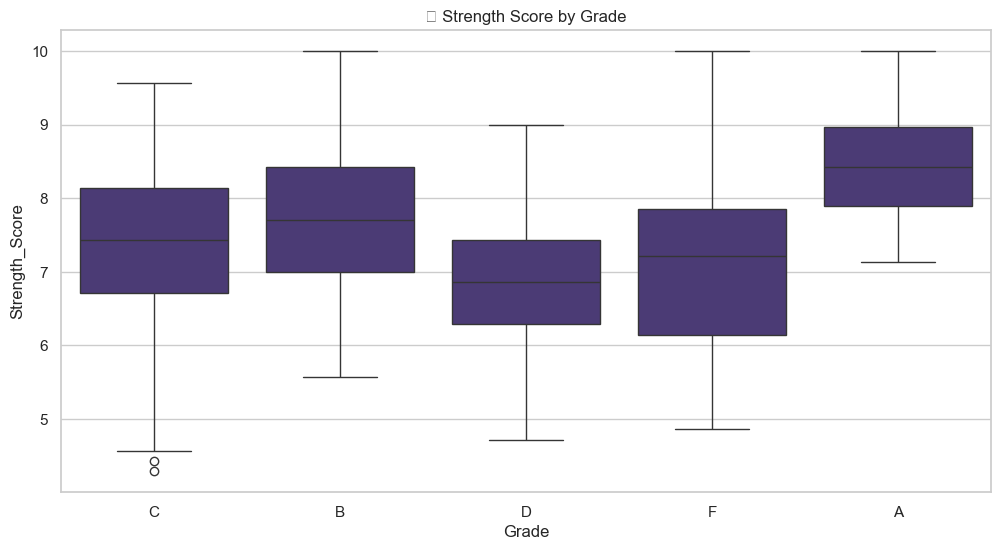

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


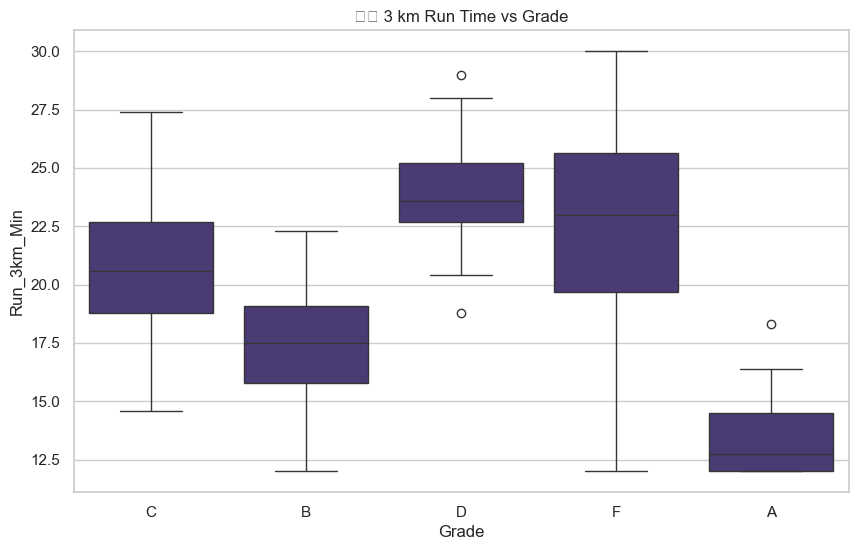

✅ All visualizations generated successfully!


In [5]:
# ============================================================
# 📊 Visualization Code for Normalized PEP Dataset
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your normalized dataset
df = pd.read_excel("PEP_Student_Performance_Final.xlsx")   # adjust name if needed

sns.set(style="whitegrid", palette="viridis")

# ------------------------------------------------------------
# 1️⃣ Distribution Plots (Histograms)
# ------------------------------------------------------------

numeric_columns = [
    "Run_3km_Min", "Pushups", "Situps", "Beep_Test",
    "Attendance_%", "Speed_Score", "Strength_Score", "Overall_Score"
]

df[numeric_columns].hist(figsize=(14, 12), bins=15, edgecolor='black')
plt.suptitle("📊 Distribution of Normalized Features", fontsize=16)
plt.show()

# ------------------------------------------------------------
# 2️⃣ Boxplots (Check Outliers)
# ------------------------------------------------------------
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numeric_columns])
plt.title("📦 Boxplot of Normalized Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

# ------------------------------------------------------------
# 3️⃣ Pairplot (Relationships Between Features)
# ------------------------------------------------------------
sns.pairplot(df[numeric_columns], diag_kind="kde")
plt.suptitle("🔗 Pairplot of Performance Features", y=1.02)
plt.show()

# ------------------------------------------------------------
# 4️⃣ Correlation Heatmap
# ------------------------------------------------------------
plt.figure(figsize=(12, 8))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Correlation Heatmap of Normalized Features")
plt.show()

# ------------------------------------------------------------
# 5️⃣ Grade Distribution
# ------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(x="Grade", data=df, palette="coolwarm")
plt.title("🎓 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# ------------------------------------------------------------
# 6️⃣ Attendance vs Grade
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x="Grade", y="Attendance_%", data=df)
sns.swarmplot(x="Grade", y="Attendance_%", data=df, color="black", alpha=0.6)
plt.title("📅 Attendance vs Grade")
plt.show()

# ------------------------------------------------------------
# 7️⃣ Performance Comparison by Grade
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x="Grade", y="Overall_Score", data=df, palette="viridis")
plt.title("💪 Overall Score by Grade")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Grade", y="Speed_Score", data=df)
plt.title("🏃 Speed Score by Grade")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Grade", y="Strength_Score", data=df)
plt.title("🏋 Strength Score by Grade")
plt.show()

# ------------------------------------------------------------
# 8️⃣ 3km Run Time vs Grade
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x="Grade", y="Run_3km_Min", data=df)
plt.title("⏱️ 3 km Run Time vs Grade")
plt.show()

print("✅ All visualizations generated successfully!")
